# Loan-Status-Prediction

- Automate real-time loan eligibility assessment using customer details submitted through online application forms.
- The goal is to develop a predictive model that considers factors such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more.
- [Dataset for this project on Kaggle](https://www.kaggle.com/datasets/ninzaami/loan-predication)
- [YouTube Video](https://youtu.be/XckM1pFgZmg?list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6)

# Importing libraries and data

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [51]:
loan_data = pd.read_csv('./Loan-data.csv')

In [52]:
loan_data.shape
loan_data.head()
loan_data.describe()

(614, 13)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling missing values

In [53]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
loan_data = loan_data.dropna()
loan_data.shape

(480, 13)

# Label encoding

Loan_Status
Y    332
N    148
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

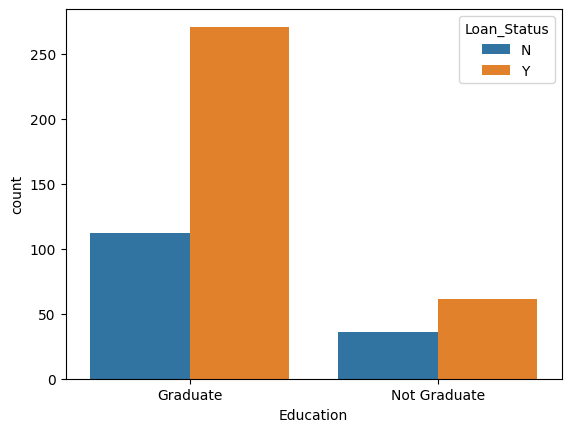

In [55]:
loan_data['Loan_Status'].value_counts()
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

## Dependents col: 3+ -> 4

In [56]:
loan_data['Dependents'].replace(to_replace='3+', value=4, inplace=True)

## Convert categorical columns to numerical

In [57]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [66]:
loan_data = loan_data.replace({
    'Gender': {
        'Male': 1, 'Female': 0
    },
    'Married': {
        'Yes': 1, 'No': 0
    },
    'Education': {
        'Graduate': 1, 'Not Graduate': 0
    },
    'Self_Employed': {
        'Yes': 1, 'No': 0
    },
    'Property_Area': {
        'Rural': 0, 'Semiurban': 1, 'Urban': 2
    },
    'Loan_Status': {
        'Y': 1, 'N': 0
    }
})

In [67]:
# from sklearn.preprocessing import LabelEncoder

# categorical_columns = ['Gender', 'Married', 'Education',
#                        'Self_Employed', 'Property_Area', 'Loan_Status']

# label_encoder = LabelEncoder()

# for column in categorical_columns:
#     loan_data[column] = label_encoder.fit_transform(loan_data[column])

# loan_data

# Separating features and target

In [68]:
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data['Loan_Status']

In [69]:
X
y

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Train test splitting

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=2)

In [71]:
X.shape
X_train.shape
X_test.shape

(480, 11)

(432, 11)

(48, 11)

# Model training and evaluation

In [72]:
classifier = SVC(kernel='linear')

In [73]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [74]:
y_train_predicted = classifier.predict(X_train)
print(accuracy_score(y_train, y_train_predicted))

0.7986111111111112


In [75]:
y_test_predicted = classifier.predict(X_test)
print(accuracy_score(y_test, y_test_predicted))

0.8333333333333334


In [76]:
list(zip(y_test, y_test_predicted))[:20]

[(1, 1),
 (1, 1),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0)]

In [80]:
X_test.iloc[:1]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
368,1,1,1,1,0,6325,0.0,175.0,360.0,1.0,1


In [81]:
classifier.predict(X_test.iloc[:1])
y_test.iloc[0]

array([1], dtype=int64)

1